In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Load data
file_path = "C:/Users/mahmu/iCloudDrive/Study/Winter_24_25/ABDA/Project/dataset/AirQualityUCI.xlsx"
data = pd.read_excel(file_path)

In [4]:
# # Standardization
# scaler = StandardScaler()
# data_standardized = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)

# # Normalization
# normalizer = MinMaxScaler()
# data_normalized = pd.DataFrame(normalizer.fit_transform(data_imputed), columns=data.columns)

In [19]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
15


In [28]:
data = data[data.columns[2:]]

In [29]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [30]:
# Preprocessing
# Missing value handling
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# data_imputed = data.dropna()

In [31]:
data_imputed.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [32]:
# Feature distribution checks
gamma_features = []
normal_features = []
for column in data.columns:
    if column != "Date" and column != "Time":
        skewness = stats.skew(data_imputed[column])
        kurtosis = stats.kurtosis(data_imputed[column])
        if skewness > 0 and kurtosis > 0:  # indicative of Gamma
            gamma_features.append(column)
        else:
            normal_features.append(column)

In [33]:
gamma_features

['NMHC(GT)', 'NOx(GT)']

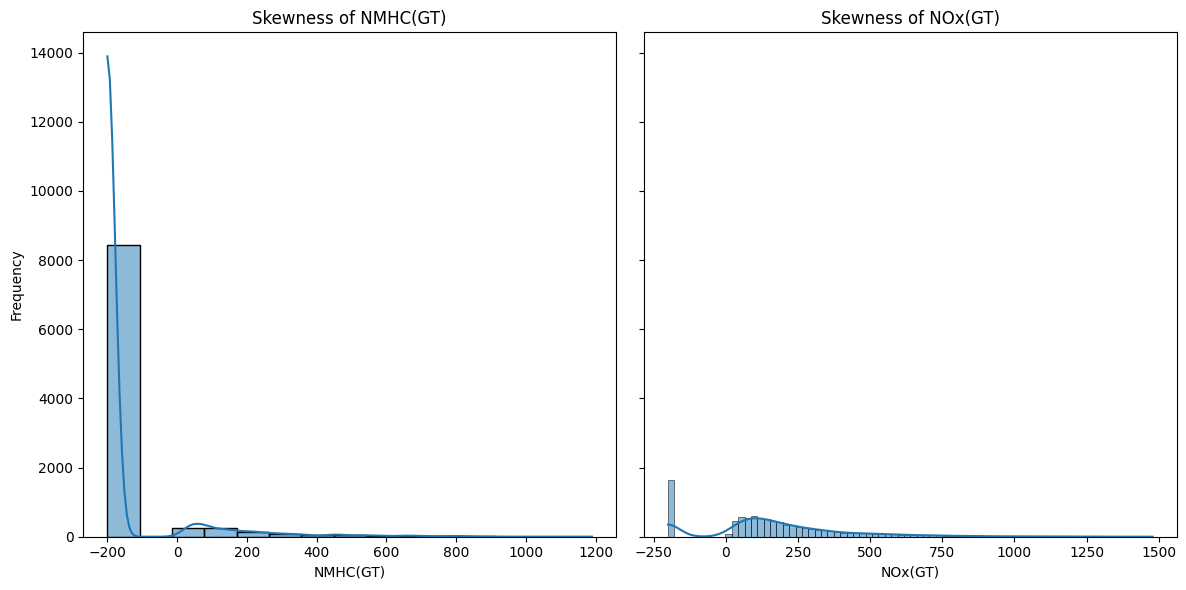

In [34]:
# Selecting the relevant columns and dropping rows with NaN values
relevant_columns = ['NMHC(GT)', 'NOx(GT)']
# data_filtered = data[relevant_columns].dropna()

# Plotting the skewness of 'NMHC(GT)' and 'NOx(GT)'
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# NMHC(GT)
sns.histplot(data_imputed['NMHC(GT)'], kde=True, ax=axes[0])
axes[0].set_title('Skewness of NMHC(GT)')
axes[0].set_xlabel('NMHC(GT)')
axes[0].set_ylabel('Frequency')

# NOx(GT)
sns.histplot(data_imputed['NOx(GT)'], kde=True, ax=axes[1])
axes[1].set_title('Skewness of NOx(GT)')
axes[1].set_xlabel('NOx(GT)')

plt.tight_layout()
plt.show()

In [35]:
normal_features

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

Plotting for: PT08.S1(CO)
Plotting for: C6H6(GT)
Plotting for: PT08.S2(NMHC)
Plotting for: PT08.S3(NOx)
Plotting for: NO2(GT)
Plotting for: PT08.S4(NO2)
Plotting for: PT08.S5(O3)
Plotting for: T
Plotting for: RH
Plotting for: AH


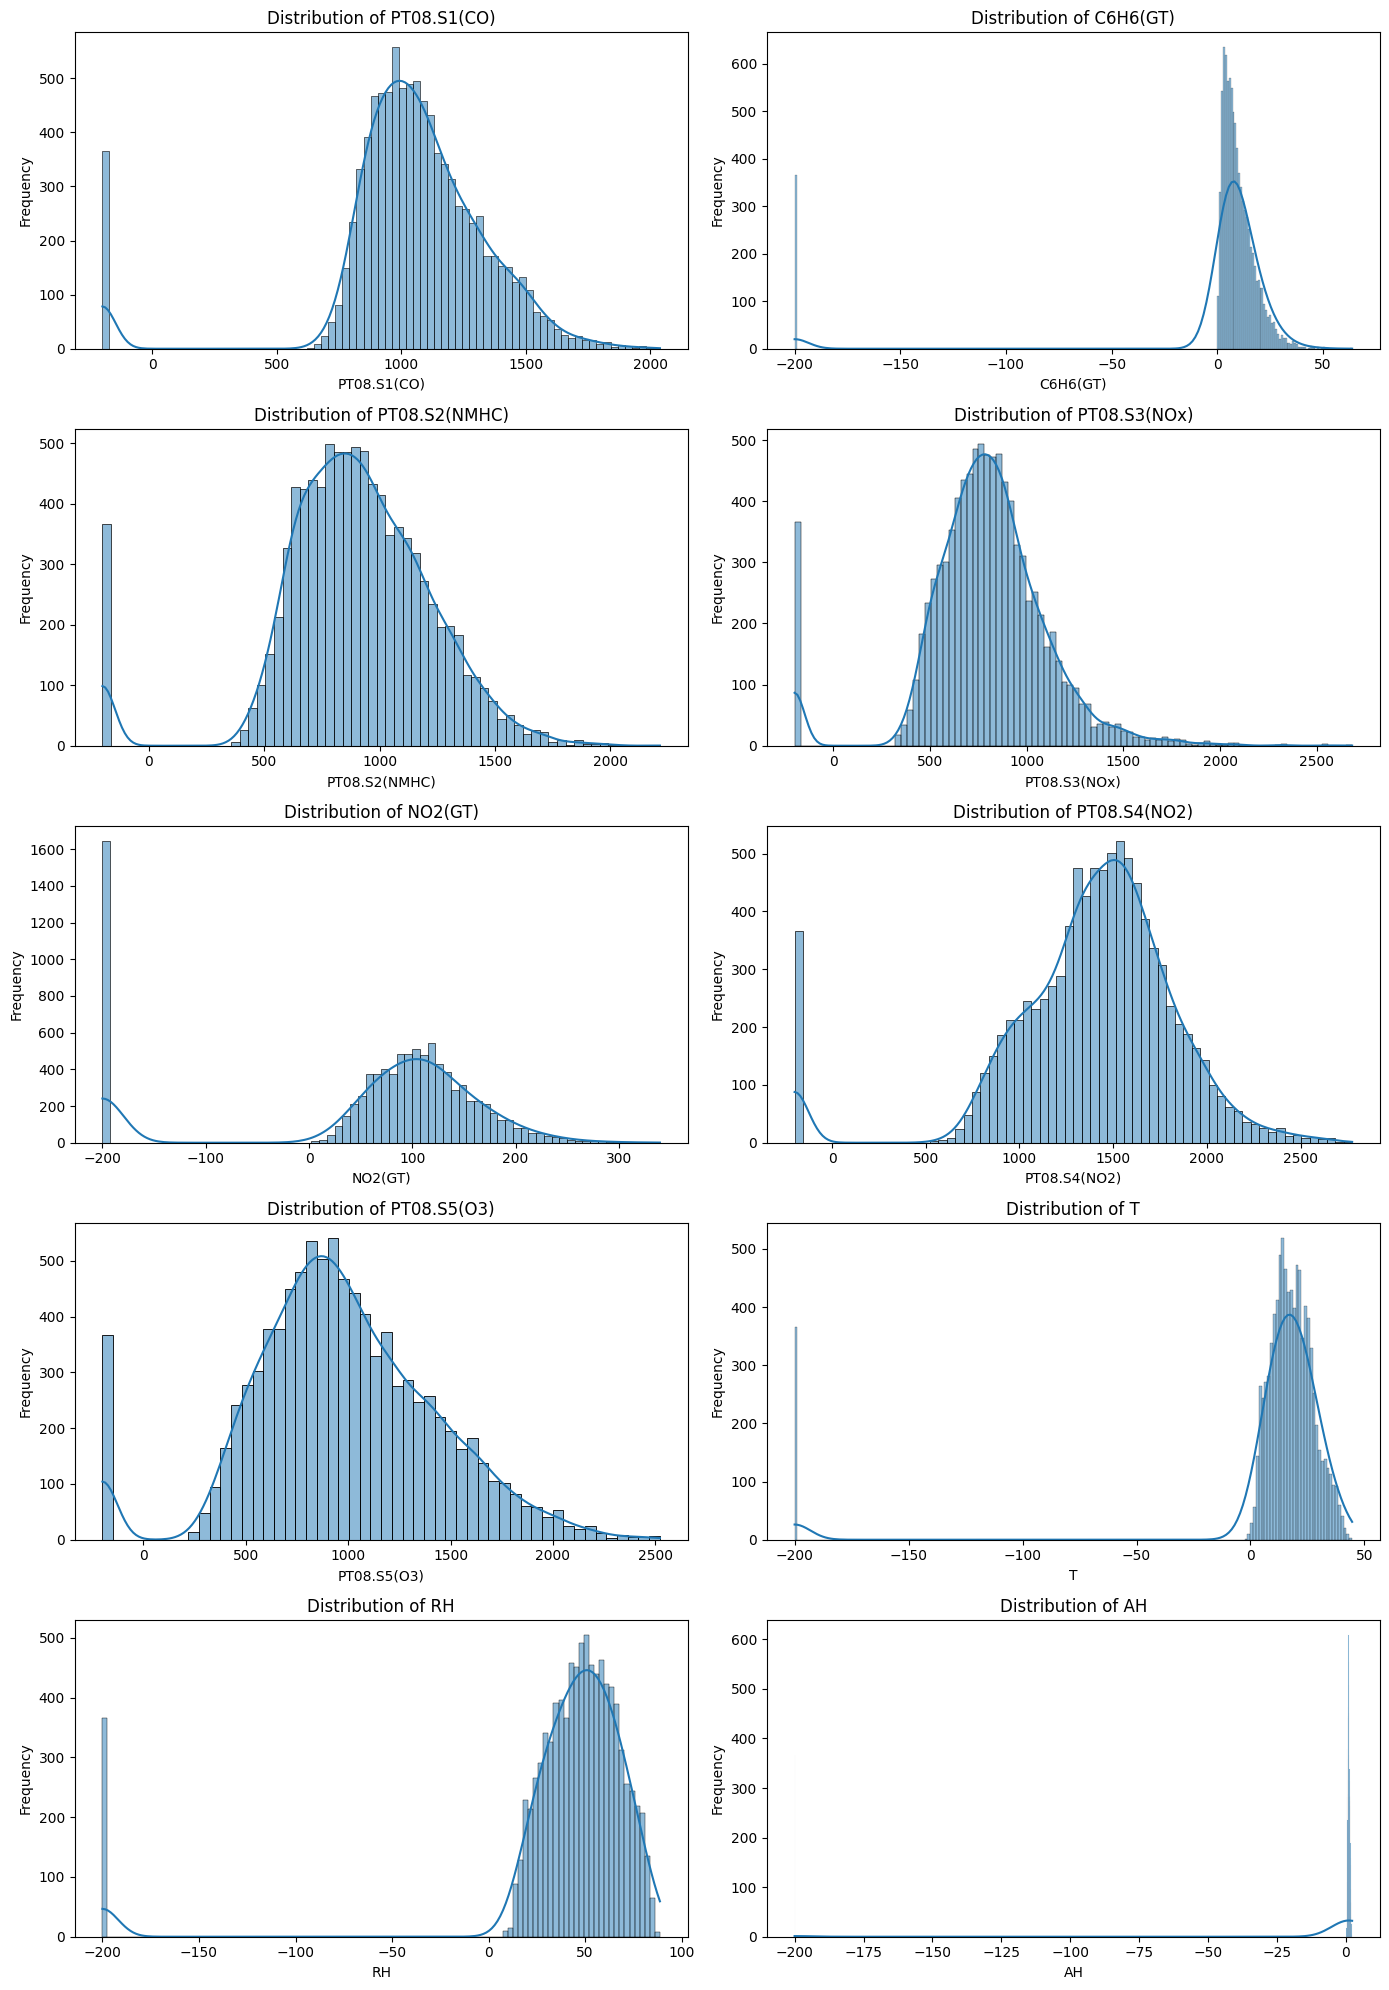

In [36]:
# Plotting each column
num_columns = len(normal_features[1:])
fig, axes = plt.subplots(5, 2, figsize=(14, 20))  # Adjusting for a grid layout

axes = axes.flatten()

for i, col in enumerate(normal_features[1:]):
    print(f"Plotting for: {col}")
    sns.histplot(data_imputed[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()